In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import StandardScaler



# 주성분 분석
## 유방암.csv 파일 열기

In [3]:
df = pd.read_csv(os.getcwd()+'/3. Big Data 분석_실습화일/유방암.csv',engine='python',encoding='euc-kr')
df.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 데이터 나누기

In [4]:
df_raw_x=df.drop("diagnosis",axis=1)
df_raw_y=df["diagnosis"]
df_raw_x.head()
df_raw_y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

## 데이터 정규화 시키기

In [5]:
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

In [6]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097,-2.073,1.270,0.984,1.568,3.284,2.653,2.532,2.218,2.256,...,1.887,-1.359,2.304,2.001,1.308,2.617,2.110,2.296,2.751,1.937
1,1.830,-0.354,1.686,1.909,-0.827,-0.487,-0.024,0.548,0.001,-0.869,...,1.806,-0.369,1.535,1.890,-0.376,-0.430,-0.147,1.087,-0.244,0.281
2,1.580,0.456,1.567,1.559,0.942,1.053,1.363,2.037,0.940,-0.398,...,1.512,-0.024,1.347,1.456,0.527,1.083,0.855,1.955,1.152,0.201
3,-0.769,0.254,-0.593,-0.764,3.284,3.403,1.916,1.452,2.867,4.911,...,-0.281,0.134,-0.250,-0.550,3.394,3.893,1.990,2.176,6.046,4.935
4,1.750,-1.152,1.777,1.826,0.280,0.539,1.371,1.428,-0.010,-0.562,...,1.299,-1.467,1.339,1.221,0.221,-0.313,0.613,0.729,-0.868,-0.397


## 주성분 분석 실시
### column의 숫자만큼 주성분 요소 를 30으로 맞춰 준다.

In [7]:
pca=PCA(n_components=30)
nd_pca=pca.fit_transform(df_scaled)

In [8]:
tmp=['Prin'+str(i) for i in range(1,31)]


df_pca = pd.DataFrame(nd_pca,columns=tmp)
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214


## 주성분 6번까지 고유치가 1이 넘는다.
## 그리고 주성분 6번까지의 분산비율이 88.8%로 6번까지 채택한다.

In [9]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [i for i in range(1,31)]
df_pca_stat['Eigenvalues']= pca.explained_variance_
df_pca_stat['EigenvaluesRatio']= pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio']=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)


,PrinNo,Eigenvalues,EigenvaluesRatio,CumEigenValueRatio
0,1,13.305,0.443,0.443
1,2,5.701,0.190,0.632
2,3,2.823,0.094,0.726
3,4,1.984,0.066,0.792
4,5,1.652,0.055,0.847
5,6,1.209,0.040,0.888
6,7,0.676,0.023,0.910
7,8,0.477,0.016,0.926
8,9,0.418,0.014,0.940
9,10,0.351,0.012,0.952


## 고유치를 그래프로 확인한다.

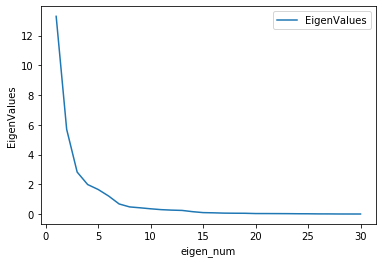

In [19]:
plt.plot(df_pca_stat['PrinNo'],df_pca_stat["Eigenvalues"],
        label='EigenValues')
plt.ylabel("EigenValues")
plt.xlabel("eigen_num")
plt.legend(loc="best")

## 고유치의 분산치를 그래프로 확인한다.

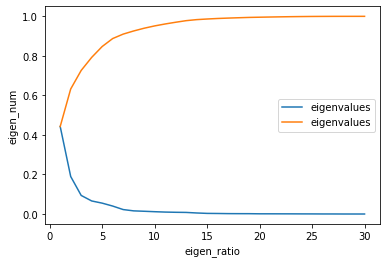

In [20]:
plt.plot(df_pca_stat["PrinNo"],df_pca_stat["EigenvaluesRatio"],label="eigenvalues")
plt.plot(df_pca_stat["PrinNo"],df_pca_stat["CumEigenValueRatio"],label="eigenvalues")
plt.xlabel("eigen_ratio")
plt.ylabel("eigen_num")
plt.legend(loc='best')



## 각 주성분 공식을 표로 나타 내었다.

In [21]:
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1, columns=tmp)],axis=1)
df_eigenvector.round(3)


,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
0,mean radius,-0.219,0.234,0.009,-0.041,-0.038,-0.019,0.124,0.007,0.223,...,0.069,-0.073,0.099,-0.183,-0.019,0.129,0.132,-0.211,-0.211,0.702
1,mean texture,-0.104,0.060,-0.065,0.603,0.049,0.032,-0.011,-0.131,-0.113,...,-0.448,-0.095,0.001,0.099,0.085,0.025,0.017,0.000,0.011,0.000
2,mean perimeter,-0.228,0.215,0.009,-0.042,-0.037,-0.017,0.114,0.019,0.224,...,0.070,-0.075,0.040,-0.117,0.027,0.125,0.115,-0.084,-0.384,-0.690
3,mean area,-0.221,0.231,-0.029,-0.053,-0.010,0.002,0.052,-0.035,0.196,...,0.018,-0.098,-0.008,0.070,-0.210,-0.363,-0.467,0.273,0.423,-0.033
4,mean smoothness,-0.143,-0.186,0.104,-0.159,0.365,0.286,0.141,0.289,-0.006,...,0.119,-0.064,0.021,0.069,0.029,0.037,-0.070,-0.001,0.003,-0.005
5,mean compactness,-0.239,-0.152,0.074,-0.032,-0.012,0.014,-0.031,0.151,0.168,...,-0.193,0.098,-0.052,-0.104,0.397,-0.263,-0.098,0.005,0.041,0.045
6,mean concavity,-0.258,-0.060,-0.003,-0.019,-0.086,0.009,0.108,0.073,-0.041,...,-0.006,0.185,-0.325,0.045,-0.097,0.549,-0.365,-0.046,0.010,0.025
7,mean concave points,-0.261,0.035,0.026,-0.065,0.044,0.052,0.150,0.152,0.112,...,0.009,0.312,0.051,0.084,-0.186,-0.388,0.455,0.009,0.004,-0.001
8,mean symmetry,-0.138,-0.190,0.040,-0.067,0.306,-0.356,0.094,0.232,-0.256,...,0.087,0.018,0.051,0.019,-0.025,0.016,0.015,-0.001,0.008,-0.001
9,mean fractal dimension,-0.064,-0.367,0.023,-0.049,0.044,0.119,-0.296,0.177,0.124,...,0.076,-0.288,0.085,-0.133,-0.207,0.097,0.101,0.006,-0.007,-0.005


## 6개의 주성분들을 diagnosis별로 분포를 확인 한다

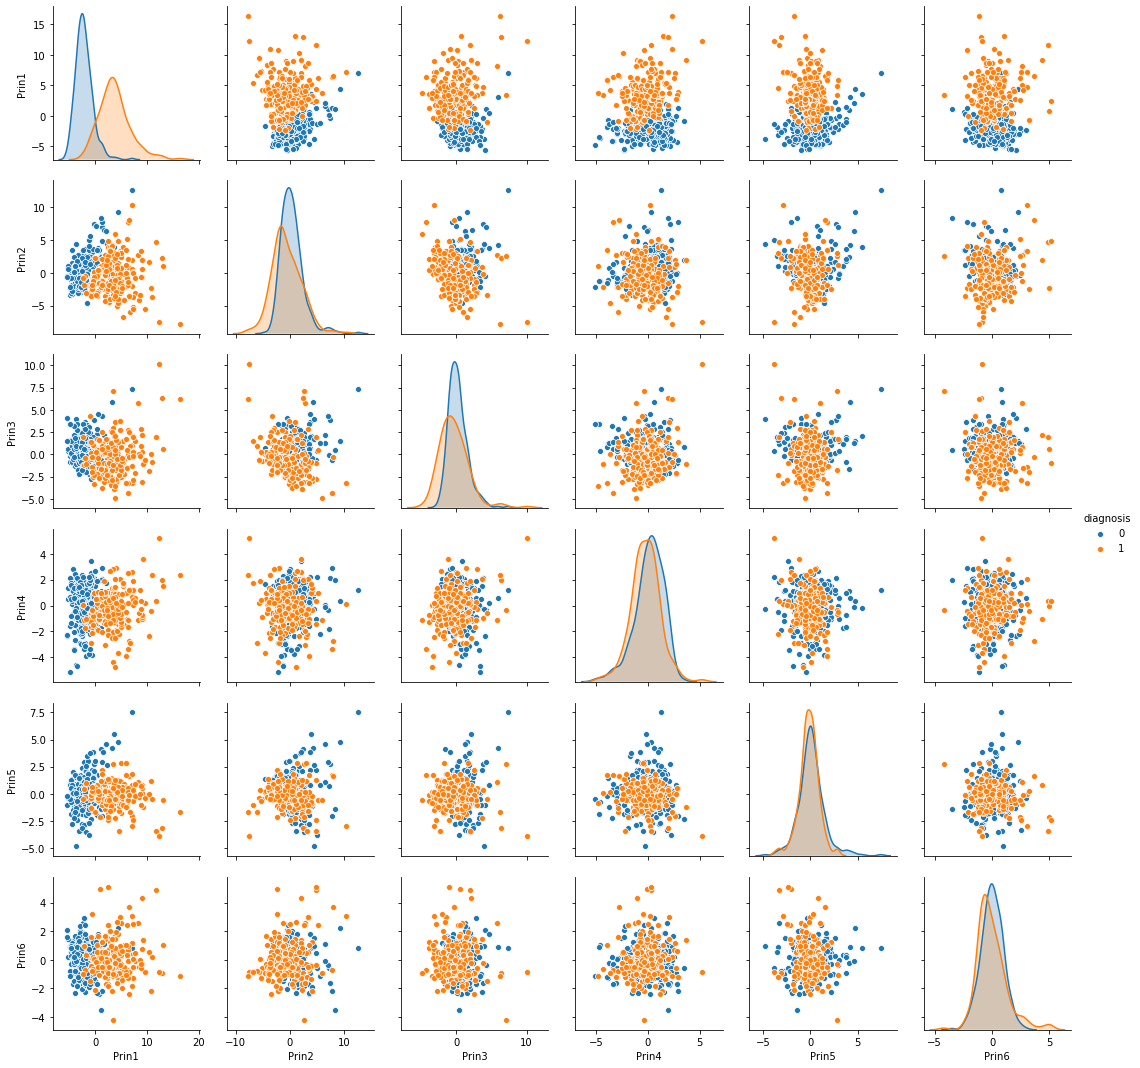

In [14]:
df_pca['diagnosis']= df['diagnosis']

g = sns.pairplot(df_pca, vars=["Prin1", "Prin2","Prin3",'Prin4','Prin5',"Prin6"] ,hue="diagnosis")

plt.show()


## 결론.
## 주성분 6까지 고유치가 1이넘고 , 분산 비율이 88.8%이므로 6개의 주성분 수치를 채택한다.